In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr = np.arange(10)

In [3]:
np.save('some_array', arr)

In [4]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
np.savez('array_achieve.npz', a= arr, b=arr)

In [6]:
arch = np.load('array_achieve.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
np.savez_compressed('arrays_compressed.npz', a= arr, b= arr)

In [8]:
x = np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([[6.,23.],[-1,7],[8,9]])

In [9]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [10]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [12]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [13]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [14]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [15]:
x@np.ones(3)

array([ 6., 15.])

In [16]:
from numpy.linalg import inv, qr

In [22]:
X = np.random.randn(5,5)
mat = X.T.dot(X)

In [19]:
inv(mat)

array([[ 0.3282617 , -0.64014649,  0.26059542, -0.15134015,  0.56540994],
       [-0.64014649,  3.69364681, -1.39405665,  2.76604532, -2.64886538],
       [ 0.26059542, -1.39405665,  0.70602608, -1.09275405,  1.0051065 ],
       [-0.15134015,  2.76604532, -1.09275405,  4.06730657, -1.62147913],
       [ 0.56540994, -2.64886538,  1.0051065 , -1.62147913,  2.13329086]])

In [24]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  2.77013154e-16,  6.06104404e-16,
        -1.68950387e-16,  7.00534595e-17],
       [-1.99038250e-15,  1.00000000e+00,  5.00562446e-16,
        -7.10598766e-17,  3.35658196e-17],
       [-4.81501909e-16, -3.58187997e-15,  1.00000000e+00,
        -3.85121708e-16,  6.10218423e-17],
       [-1.06058484e-15,  2.21546352e-15, -8.85802351e-16,
         1.00000000e+00,  2.27526106e-17],
       [ 4.17039361e-16,  1.53271512e-15, -1.38042777e-16,
        -1.62257934e-16,  1.00000000e+00]])

In [25]:
q,r = qr(mat)

In [26]:
r

array([[-2.83048066, -6.37424557, -2.66442716,  3.93458268,  3.32198717],
       [ 0.        ,  0.55925934,  0.09367112, -2.42549945, -2.72636251],
       [ 0.        ,  0.        , -5.27449009, -4.44370019,  1.61686592],
       [ 0.        ,  0.        ,  0.        ,  0.59814013,  3.79253055],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.57776821]])

In [27]:
samples = np.random.normal(size=(4,4))

In [28]:
samples

array([[-1.33000896,  2.83482075, -0.30687552, -1.63987476],
       [ 0.34108867, -0.12380032,  0.13035136, -0.50614847],
       [ 1.06135274, -1.53304643, -0.20521866,  0.99080923],
       [ 1.15984592,  0.26471346,  0.46952435, -0.47533066]])

In [29]:
from random import normalvariate

In [30]:
N = 1000000

In [32]:
%timeit samples = [normalvariate(0,1) for _ in range(N)]

1.57 s ± 59.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%timeit np.random.normal(size=N)

45.7 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
np.random.seed(1234)

In [35]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

In [37]:
import random
position = 0
walk = [position]
steps= 1000
for i in range(steps) :
    step =1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

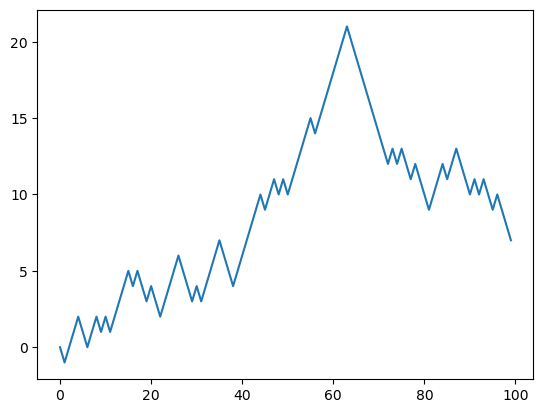

In [40]:
plt.plot(walk[:100])

In [41]:
nsteps = 1000
draws = np.random.randint(0,2,size=nsteps)
steps = np.where(draws>0, 1, -1)
walk = steps.cumsum()

In [42]:
walk.min()

-9

In [43]:
walk.max()

60

In [44]:
(np.abs(walk) >= 10).argmax()

297

In [46]:
nwalks = 50000
nsteps = 1000

draws = np.random.randint(0,2, size = (nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

walks

array([[ -1,  -2,  -1, ..., -14, -15, -14],
       [ -1,  -2,  -1, ..., -26, -27, -26],
       [  1,   0,   1, ..., -42, -43, -42],
       ...,
       [  1,   0,  -1, ..., -48, -49, -48],
       [ -1,  -2,  -1, ...,  -6,  -7,  -6],
       [  1,   2,   3, ...,   0,   1,   0]], dtype=int32)

In [47]:
walks.max()

145

In [48]:
walks.min()

-146

In [50]:
walks.shape

(50000, 1000)

In [51]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ...,  True, False, False])

In [52]:
hits30.sum()

33664

In [53]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [54]:
crossing_times.mean()

504.63349572243345